# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 11.0487940602117529, performing 33.1 it/sec
Step 100: Loss = 1.9891440832727796, performing 240.1 it/sec
Step 200: Loss = 0.1877563384004084, performing 226.5 it/sec
No improvement since Step 188, early stopping.
[Best]  Step 187: Loss = 0.1826662067478799
[Final] Step 237: Loss = 0.1834082640948223

predicted end states
------------------------------------
         5th       Mean      95th
TSDC-1  5.70e-03  5.70e-03  5.70e-03
TSDC-2  1.31e-07  1.31e-07  1.31e-07
TSDC-3  1.02e-04  1.02e-04  1.02e-04
TSDC-4  2.35e-09  2.35e-09  2.35e-09
TSDC-5  1.37e-08  1.37e-08  1.37e-08


predicted conditional events
----------------------------------
       5th       Mean      95th
TSDC  1.00e+00  1.00e+00  1.00e+00
BPHR  1.76e-02  1.76e-02  1.76e-02
DRSC  1.34e-04  1.34e-04  1.34e-04
DRLA  2.30e-05  2.30e-05  2.30e-05




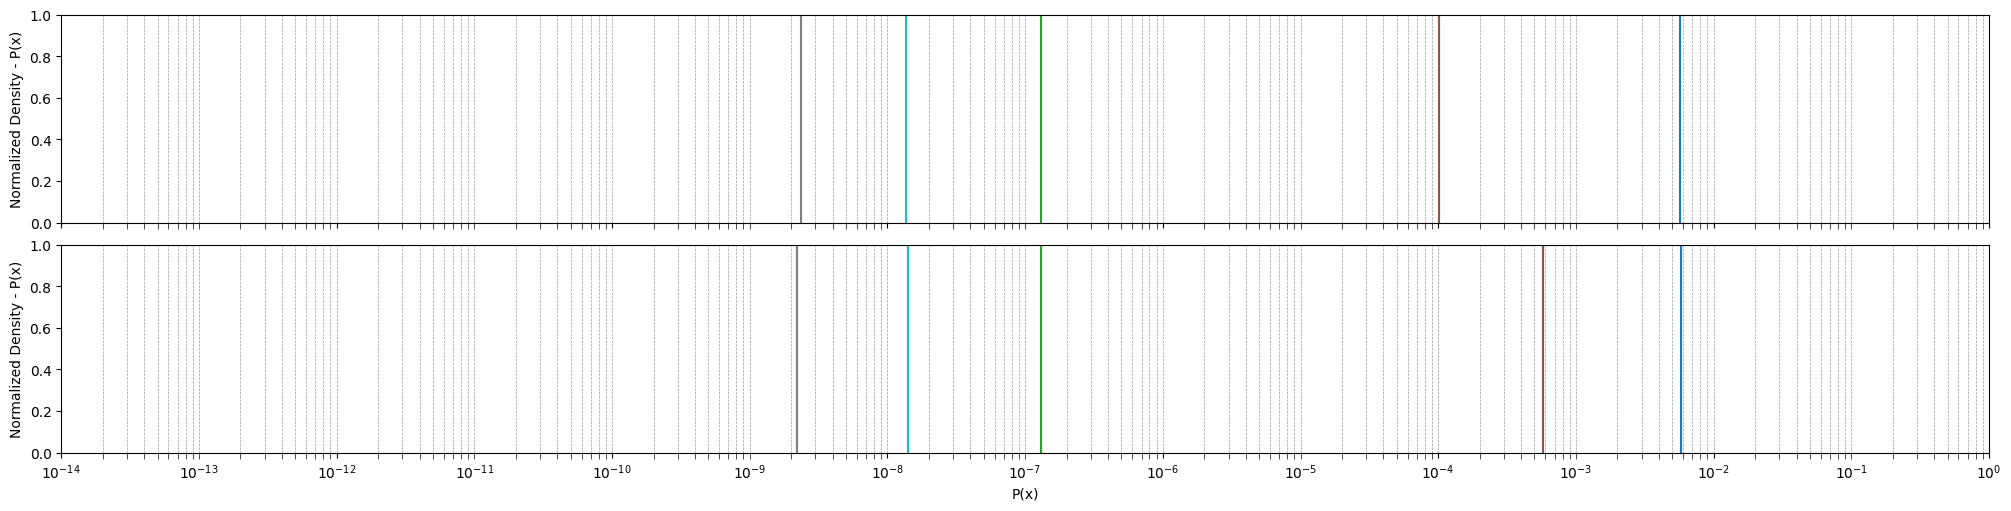

In [3]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 5.8e-3,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['TSDC', 'BPHR', 'DRSC', 'DRLA'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'TSDC-1': {
        'sequence': [1, 0, np.nan, 0],
        'probability': 5.8E-3,
    },
    'TSDC-2': {
        'sequence': [1, 0, np.nan, 1],
        'probability': 1.3E-7,
    },
    'TSDC-3': {
        'sequence': [1, 1, 0, 0],
        'probability': 5.8E-4, # There was no given frequency
    },
    'TSDC-4': {
        'sequence': [1, 1, 0, 1],
        'probability': 2.2E-9,
    },
    'TSDC-5': {
        'sequence': [1, 1, 1, np.nan],
        'probability': 1.4E-8,
    },
    # 'TSDC-0': {
    #     'sequence': [0, np.nan, np.nan, np.nan],
    #     'probability': 1.0 - 5.80e-3 - 1.30e-7 - 1.63e-8 - 2.20e-9 - 1.40e-8, # one minus all the other end-states
    # },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)